In [27]:
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score


df2, meta2 = pyreadstat.read_sav(r'C:\Users\90536\Downloads\saadUS1.sav')
#df2, meta = pyreadstat.read_sav('C:/Users/saads/OneDrive/Desktop/saadUS.sav')


In [28]:
df2


,PercentageHighSchool,EnglishMarks,MathsMarks,PhysicsMarks,ChemistryMarks,BiologyMarks,AccountingMarks,ComputerMarks,ComputerSkills,ArtsSkills,PsychologySkills,MedicalSkills,PoliticsSkills,MedicalSkills2,LawSkills,ComputerSkills2,BankingSkills,BankingSkills2,CGPA,UniversityDepartment
0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,5.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0
1,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
2,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
4,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,1.0,5.0,4.0,5.0,2.0,3.0,1.0,2.0,4.0,3.0,6.0
146,3.0,3.0,5.0,3.0,1.0,3.0,5.0,4.0,5.0,1.0,5.0,4.0,5.0,3.0,4.0,1.0,4.0,4.0,5.0,6.0
147,3.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,1.0,5.0,5.0,5.0,2.0,2.0,3.0,5.0,2.0,2.0,4.0,3.0
148,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,7.0


In [29]:
null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum()

EnglishMarks        2
PhysicsMarks        4
ChemistryMarks      6
BiologyMarks       31
AccountingMarks    23
ComputerMarks      19
dtype: int64

In [30]:
data=df2.apply (pd.to_numeric, errors='coerce')
data=df2.fillna(0)

df2.update(data)
df2



,PercentageHighSchool,EnglishMarks,MathsMarks,PhysicsMarks,ChemistryMarks,BiologyMarks,AccountingMarks,ComputerMarks,ComputerSkills,ArtsSkills,PsychologySkills,MedicalSkills,PoliticsSkills,MedicalSkills2,LawSkills,ComputerSkills2,BankingSkills,BankingSkills2,CGPA,UniversityDepartment
0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,5.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0
1,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
2,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
4,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,1.0,5.0,4.0,5.0,2.0,3.0,1.0,2.0,4.0,3.0,6.0
146,3.0,3.0,5.0,3.0,1.0,3.0,5.0,4.0,5.0,1.0,5.0,4.0,5.0,3.0,4.0,1.0,4.0,4.0,5.0,6.0
147,3.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,1.0,5.0,5.0,5.0,2.0,2.0,3.0,5.0,2.0,2.0,4.0,3.0
148,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,7.0


In [31]:
null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum()

Series([], dtype: float64)

In [32]:
categorical_features=[feature for feature in df2.columns if df2[feature].dtype=='O']
categorical_features

[]

In [33]:
categorical_features2=df2.select_dtypes(include=np.number).columns.tolist()
categorical_features2

['PercentageHighSchool',
 'EnglishMarks',
 'MathsMarks',
 'PhysicsMarks',
 'ChemistryMarks',
 'BiologyMarks',
 'AccountingMarks',
 'ComputerMarks',
 'ComputerSkills',
 'ArtsSkills',
 'PsychologySkills',
 'MedicalSkills',
 'PoliticsSkills',
 'MedicalSkills2',
 'LawSkills',
 'ComputerSkills2',
 'BankingSkills',
 'BankingSkills2',
 'CGPA',
 'UniversityDepartment']

In [34]:
df2.describe(include='all')

,PercentageHighSchool,EnglishMarks,MathsMarks,PhysicsMarks,ChemistryMarks,BiologyMarks,AccountingMarks,ComputerMarks,ComputerSkills,ArtsSkills,PsychologySkills,MedicalSkills,PoliticsSkills,MedicalSkills2,LawSkills,ComputerSkills2,BankingSkills,BankingSkills2,CGPA,UniversityDepartment
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,3.273333,3.440000,3.480000,3.220000,2.920000,2.513333,2.726667,3.146667,4.080000,2.993333,4.140000,3.626667,3.173333,2.793333,2.840000,2.906667,3.053333,3.606667,3.933333,3.266667
std,1.140450,1.217766,1.364556,1.304972,1.397601,1.782603,1.596543,1.635950,1.013466,1.245107,1.029954,1.126536,1.145441,1.307165,1.204466,1.317648,1.202830,1.180926,0.909802,2.395932
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,4.000000,2.000000,4.000000,3.000000,2.250000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000
50%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.500000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,6.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000


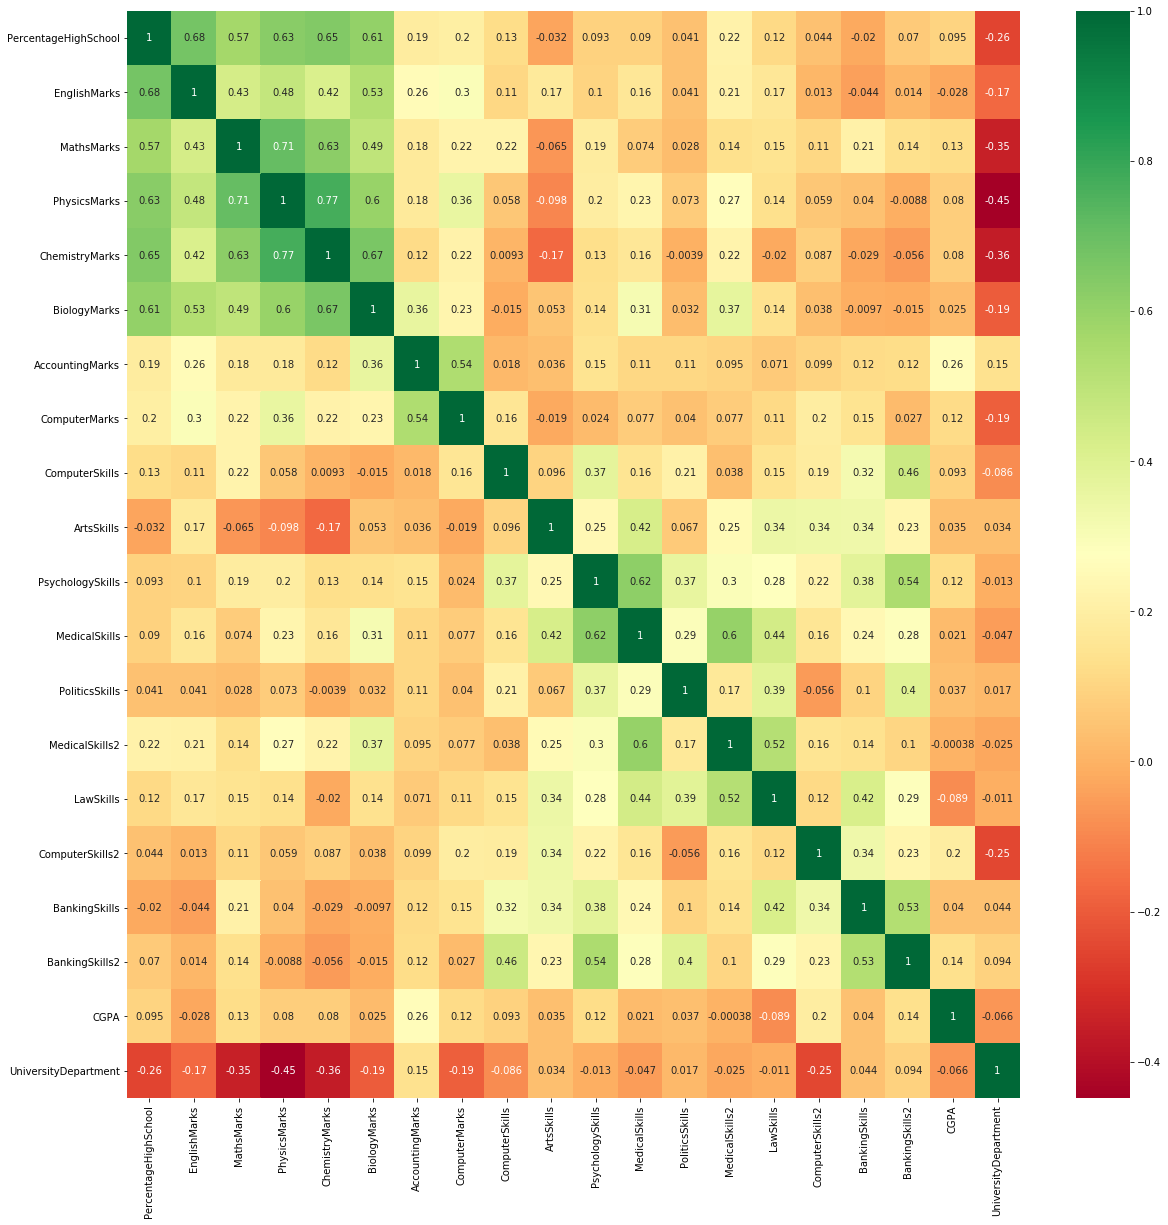

In [35]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [36]:
X = df2.drop(['CGPA','UniversityDepartment'],1) 
X

,PercentageHighSchool,EnglishMarks,MathsMarks,PhysicsMarks,ChemistryMarks,BiologyMarks,AccountingMarks,ComputerMarks,ComputerSkills,ArtsSkills,PsychologySkills,MedicalSkills,PoliticsSkills,MedicalSkills2,LawSkills,ComputerSkills2,BankingSkills,BankingSkills2
0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,5.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0
1,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0
2,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0
3,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0
4,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,1.0,5.0,4.0,5.0,2.0,3.0,1.0,2.0,4.0
146,3.0,3.0,5.0,3.0,1.0,3.0,5.0,4.0,5.0,1.0,5.0,4.0,5.0,3.0,4.0,1.0,4.0,4.0
147,3.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,1.0,5.0,5.0,5.0,2.0,2.0,3.0,5.0,2.0,2.0
148,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [37]:
Y = df2['UniversityDepartment']

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)



In [40]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=10)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [41]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=10)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [42]:
#clf_gini.predict([3, 3, 1, 1])
X_test.shape

(45, 18)

In [43]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1., 1., 1., 1., 6., 1., 1., 1., 1., 1., 1., 6., 1., 1., 6., 1., 1.,
       6., 1., 6., 6., 1., 1., 6., 1., 1., 6., 1., 1., 1., 6., 1., 1., 1.,
       1., 1., 1., 6., 1., 1., 1., 1., 1., 6., 1.])

In [44]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)


Accuracy is  62.22222222222222


[Text(413.3333333333333, 792.75, 'X[2] <= 4.0\ngini = 1.0\nsamples = 105\nvalue = [53, 2, 9, 6, 32, 3]'),
 Text(206.66666666666666, 566.25, 'X[6] <= 2.0\ngini = 1.0\nsamples = 71\nvalue = [28, 2, 3, 6, 29, 3]'),
 Text(103.33333333333333, 339.75, 'gini = 1.0\nsamples = 15\nvalue = [9, 0, 2, 2, 0, 2]'),
 Text(310.0, 339.75, 'X[17] <= 4.0\ngini = 1.0\nsamples = 56\nvalue = [19, 2, 1, 4, 29, 1]'),
 Text(206.66666666666666, 113.25, 'gini = 1.0\nsamples = 23\nvalue = [11, 0, 1, 3, 8, 0]'),
 Text(413.3333333333333, 113.25, 'gini = 1.0\nsamples = 33\nvalue = [8, 2, 0, 1, 21, 1]'),
 Text(620.0, 566.25, 'X[17] <= 4.0\ngini = 0.0\nsamples = 34\nvalue = [25, 0, 6, 0, 3, 0]'),
 Text(516.6666666666666, 339.75, 'gini = 0.0\nsamples = 13\nvalue = [7, 0, 6, 0, 0, 0]'),
 Text(723.3333333333333, 339.75, 'X[15] <= 2.0\ngini = 0.0\nsamples = 21\nvalue = [18, 0, 0, 0, 3, 0]'),
 Text(620.0, 113.25, 'gini = 0.0\nsamples = 10\nvalue = [7, 0, 0, 0, 3, 0]'),
 Text(826.6666666666666, 113.25, 'gini = 0.0\nsamples 

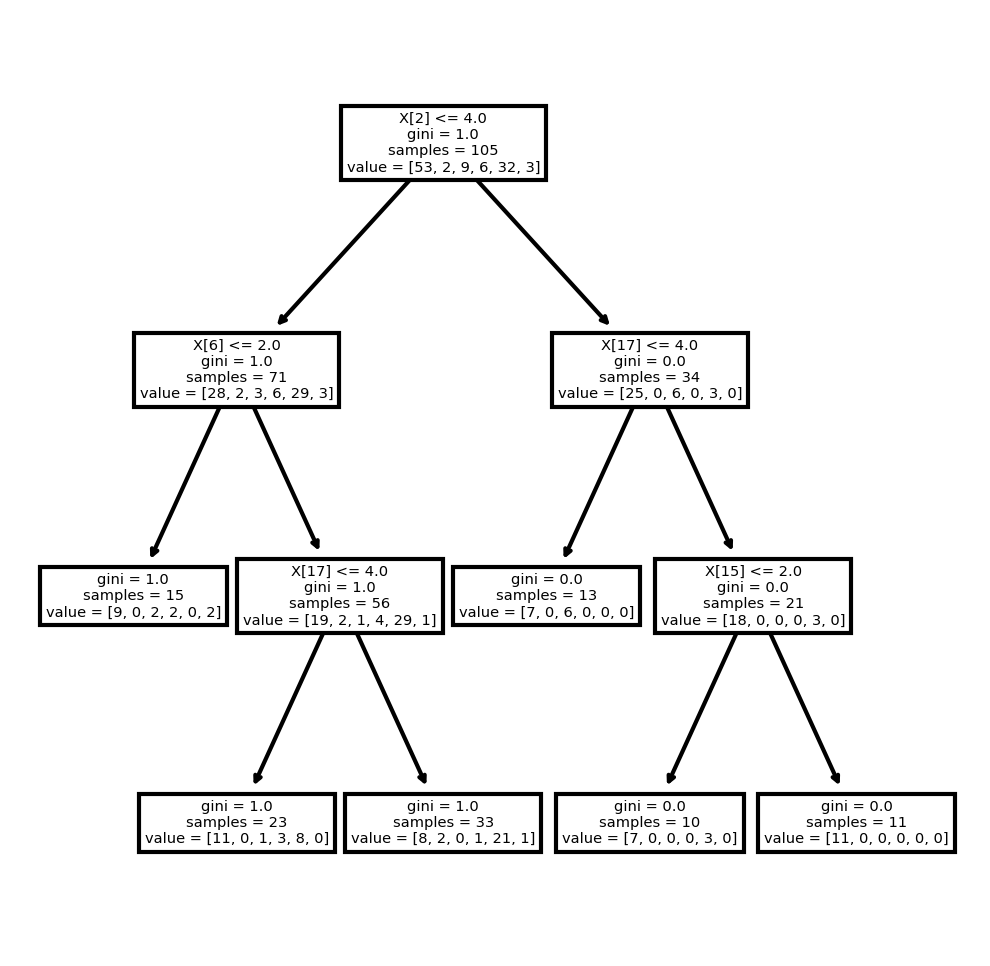

In [45]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf)
tree.plot_tree(clf_gini, precision=0)

In [46]:
# RMSE

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [65]:
rms = sqrt(mean_squared_error(Y, y_predicted))
rms

2.1150256105620406

In [66]:
rmse = sqrt(mean_squared_error(Y, y_predicted,squared=False))
rmse

1.4543127622908494

In [67]:
# MAE

In [68]:
from sklearn.metrics import mean_absolute_error

In [69]:
mae = mean_absolute_error(Y,y_predicted)
mae

0.9133333333333333

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
 
predictions = logmodel.predict(X_test)
predictions

C:\Users\90536\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1., 1., 1., 1., 6., 6., 1., 1., 1., 5., 1., 6., 1., 1., 6., 7., 1.,
       6., 1., 3., 6., 1., 6., 6., 1., 1., 1., 6., 1., 1., 1., 5., 1., 1.,
       1., 1., 1., 6., 6., 6., 6., 5., 3., 6., 1.])

In [71]:
predictions = logmodel.predict(X_test)
#print(classification_report(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.6444444444444445


In [73]:
X_test.head(2)

,PercentageHighSchool,EnglishMarks,MathsMarks,PhysicsMarks,ChemistryMarks,BiologyMarks,AccountingMarks,ComputerMarks,ComputerSkills,ArtsSkills,PsychologySkills,MedicalSkills,PoliticsSkills,MedicalSkills2,LawSkills,ComputerSkills2,BankingSkills,BankingSkills2
128,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0
11,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,3.0


In [74]:
predictions[29]

1.0

In [75]:
params = logmodel.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [76]:
print('Intercept: \n', logmodel.intercept_)


Intercept: 
 [-0.42838164 -4.15724295 -0.70234306  1.72093516 -0.24985901  3.8168915 ]


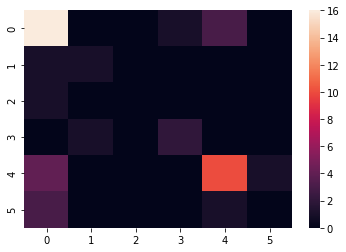

In [77]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)))
plt.show()

In [78]:
# RMSE

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [80]:
y_predicted = logmodel.predict(X)
y_predicted

array([1., 1., 1., 1., 1., 1., 6., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 6., 1., 6., 1., 6., 1., 1., 1., 1., 6., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 6., 1., 1., 1., 5., 1., 1., 1., 1., 6.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 6., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 6., 1., 6., 6., 6., 6., 6., 1., 6., 1., 6.,
       6., 1., 3., 6., 6., 5., 3., 5., 5., 3., 6., 1., 7., 1., 5., 3., 5.,
       3., 6., 6., 1., 6., 6., 1., 6., 3., 3., 3., 3., 6., 6., 1., 5., 1.,
       1., 1., 6., 1., 6., 6., 6., 1., 6., 1., 6., 6., 6., 1., 1., 6., 6.,
       6., 6., 6., 7., 5., 2., 1., 6., 6., 6., 6., 3., 7., 1.])

In [81]:
rms = sqrt(mean_squared_error(Y, y_predicted))
rms

2.1150256105620406

In [82]:
rmse = sqrt(mean_squared_error(Y, y_predicted,squared=False))
rmse

1.4543127622908494

In [83]:
# MAE

In [84]:
from sklearn.metrics import mean_absolute_error

In [85]:
mae = mean_absolute_error(Y,y_predicted)
mae

0.9133333333333333